In [3]:
import numpy as np
from auxiliary_code_for_examples import plot_data,experimentSimulator
from quantum_state_estimation import MeasurementType
from scipy.io import loadmat
from qutip import rand_unitary_haar
import os

cwd = os.getcwd()

In [4]:
min_noq = 1
max_noq = 7

no_trials = 50

print('_'*60)
print('{:<6s}   {:<10s}     {:>3s}'.format("Number of Qubits", "Fidelity", "Runtime in sec."))
print('_'*60)
time_pio , fidelities_pio, = dict() , dict()

for no_qubits in range( min_noq , max_noq + 1 , 1):
    dimension = 2**no_qubits
    loades = loadmat(cwd + '/MUBs/MUBs' + str(no_qubits)+ '.mat')    
    bases = [np.matrix(loades['m'+str(no_qubits)+str(i)]) for i in range(dimension+1) ]
    
    time_pio[no_qubits], fidelities_pio[no_qubits] = experimentSimulator(
            dimension,
            MeasurementType.Bases,
            [rand_unitary_haar(dimension).full() for _ in range(dimension+1) ],
            50,
            100*dimension)
    
    print('    {:<3d}            {:<10f}      {:^3.7f}'.
          format(no_qubits, fidelities_pio[no_qubits], time_pio[no_qubits]))

____________________________________________________________
Number of Qubits   Fidelity       Runtime in sec.
____________________________________________________________
    1              0.991231        0.0009999
    2              0.937053        0.0009406
    3              0.931573        0.0014766
    4              0.923734        0.0025126
    5              0.908635        0.0114933
    6              0.887830        0.0475561
    7              0.852595        0.4373239


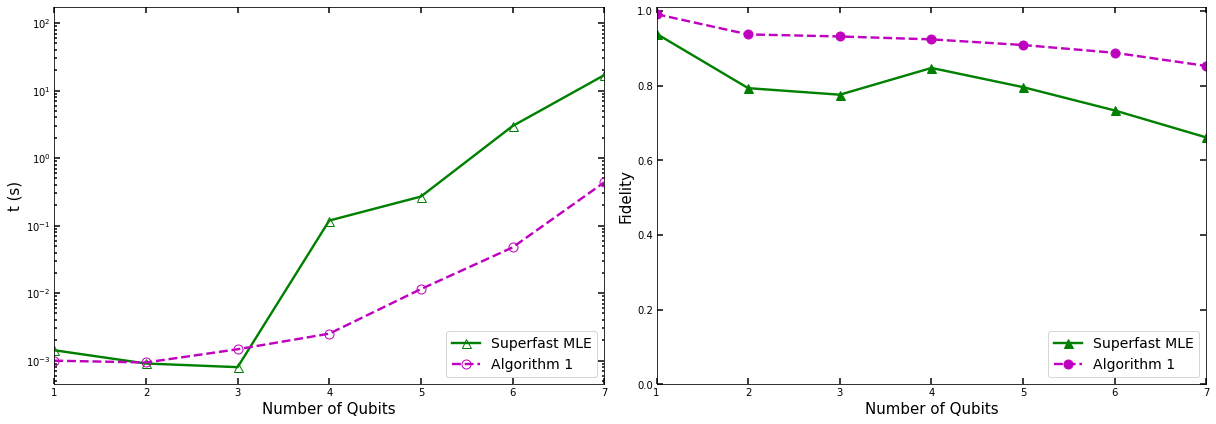

In [6]:
from scipy import io
from datetime import datetime

name = 'data_rand.mat'

path_file = cwd + '/superfastMLE-simulated-data/' + name

mat = io.loadmat(path_file)

mle_data = mat['Data']

keys = [int(i) for i in mle_data[0]]

runtime_mle = dict( zip( keys, mle_data[1]) )

fidelity_mle =  dict( zip( keys, mle_data[2]) )

nof = 'plotMubs_' + datetime.today().strftime('%Y-%m-%d')

plot_data( time_pio , fidelities_pio, runtime_mle, fidelity_mle, name_of_file = nof )